Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 5: Bayesove mreže i naivni Bayesov klasifikator

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.1</i> <br/>
<i>Zadnji put ažurirano: 27. prosinca 2016.</i> 

Objavljeno: **27. prosinca 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **2. siječnja 2017.**

### Upute

Peta laboratorijska vježba sastoji se od tri zadatka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


### 1. Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [pgmpy](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate.

#### (a)

Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (sl. varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Sve varijable modelirane su Bernoullijevom razdiobom.

![This](bayes-net-sprinkler.jpg)

Koristeći paket [pgmpy](https://github.com/pgmpy/pgmpy), konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim provedite **egzaktno** zaključivanje za sljedeće upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu.

**NB:** Bacite oko na službenu demonstraciju danu na https://github.com/pgmpy/pgmpy/blob/dev/examples/Monte%20Hall%20Problem.ipynb.

In [2]:
import sys
sys.path.append("C:\putanja\do\pgmpy")
from pgmpy.models import BayesianModel, NaiveBayes
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [3]:
# Vaš kôd ovdje...
model = BayesianModel([('C', 'S'), ('C', 'R'), ('S', 'W'), ('R', 'W')])

cpd_c = TabularCPD('C', 2, [[0.5, 0.5]])
print cpd_c

cpd_s = TabularCPD('S', 2, [[0.1, 0.5], [0.9, 0.5]], evidence=['C'], evidence_card=[2])
print cpd_s

cpd_r = TabularCPD('R', 2, [[0.8, 0.2], [0.2, 0.8]], evidence=['C'], evidence_card=[2])
print cpd_r

cpd_w = TabularCPD('W', 2, [[0.99, 0.9, 0.9, 0.0], [0.01, 0.1, 0.1, 1.0]], evidence=['S','R'], evidence_card=[2,2])
print cpd_w,"\n\n"

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)
model.check_model()

infer = VariableElimination(model)

posterior_p = infer.query(['W'])
print "P(w=1) "
print(posterior_p['W'])

posterior_p = infer.query(['S'], evidence={'W': 0})
print "\nP(s=1|w=1) "
print(posterior_p['S'])

posterior_p = infer.query(['R'], evidence={'W': 0})
print "\nP(r=1|w=1) "
print(posterior_p['R'])

posterior_p = infer.query(['C'], evidence={'S': 0, 'R': 0})
print "\nP(c=1|s=1,r=1) "
print(posterior_p['C'])

posterior_p = infer.query(['C'])
print "\nP(c=1) "
print(posterior_p['C'])

+-----+-----+
| C_0 | 0.5 |
+-----+-----+
| C_1 | 0.5 |
+-----+-----+
+-----+-----+-----+
| C   | C_0 | C_1 |
+-----+-----+-----+
| S_0 | 0.1 | 0.5 |
+-----+-----+-----+
| S_1 | 0.9 | 0.5 |
+-----+-----+-----+
+-----+-----+-----+
| C   | C_0 | C_1 |
+-----+-----+-----+
| R_0 | 0.8 | 0.2 |
+-----+-----+-----+
| R_1 | 0.2 | 0.8 |
+-----+-----+-----+
+-----+------+-----+-----+-----+
| S   | S_0  | S_0 | S_1 | S_1 |
+-----+------+-----+-----+-----+
| R   | R_0  | R_1 | R_0 | R_1 |
+-----+------+-----+-----+-----+
| W_0 | 0.99 | 0.9 | 0.9 | 0.0 |
+-----+------+-----+-----+-----+
| W_1 | 0.01 | 0.1 | 0.1 | 1.0 |
+-----+------+-----+-----+-----+ 


P(w=1) 
+-----+----------+
| W   |   phi(W) |
|-----+----------|
| W_0 |   0.6471 |
| W_1 |   0.3529 |
+-----+----------+

P(s=1|w=1) 
+-----+----------+
| S   |   phi(S) |
|-----+----------|
| S_0 |   0.4298 |
| S_1 |   0.5702 |
+-----+----------+

P(r=1|w=1) 
+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   0.7079 |
| R_1 |   0.

**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže? <br>
**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi? <br>
**Q:** Ako je trava mokra ($w=1$), što je prema mreži vjerojatnije -- da je pala kiša ($r=1$) ili da je netko upalio prskalicu ($s=1$)? <br>
**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?

#### (b)

**Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. S obzirom na to da i prva i druga varijabla mogu samostalno objasniti treću, ono što se događa jest to da, ako znamo da se ostvarila treća varijabla, naše vjerovanje o prvoj varijabli mijenja ovisno o tome je li se ili nije dogodila druga varijabla (i obrnuto).

Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [4]:
# Vaš kôd ovdje...
posterior_p = infer.query(['R'], evidence={'W': 0})
print "P(r=1|w=1) "
print(posterior_p['R'])

posterior_p = infer.query(['R'], evidence={'W': 0, 'S': 0})
print "\nP(r=1|w=1,s=1) "
print(posterior_p['R'])

posterior_p = infer.query(['R'], evidence={'W': 0, 'S': 1})
print "\nP(r=1|w=1,s=0) "
print(posterior_p['R'])

P(r=1|w=1) 
+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   0.7079 |
| R_1 |   0.2921 |
+-----+----------+

P(r=1|w=1,s=1) 
+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   0.3204 |
| R_1 |   0.6796 |
+-----+----------+

P(r=1|w=1,s=0) 
+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   1.0000 |
| R_1 |   0.0000 |
+-----+----------+


**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

#### (c) 

Koristeći [`BayesianModel.is_active_trail`](http://pgmpy.org/models.html#pgmpy.models.BayesianModel.BayesianModel.is_active_trail) provjerite jesu li varijable oblačnosti ($C$) i mokre trave ($W$) uvjetno nezavisne.

In [5]:
# Vaš kôd ovdje...
model.is_active_trail('C','W')

True

Što mora vrijediti kako te dvije varijable ne bi bile uvjetno nezavisne? Provjerite korištenjem iste funkcije.

In [6]:
# Vaš kôd ovdje...
print model.get_independencies()
model.is_active_trail('C','W', observed=['S', 'R'])

(C _|_ W | S, R)
(R _|_ S | C)
(S _|_ R | C)
(W _|_ C | S, R)


False

**Q:** Kako možemo na temelju grafa saznati koje dvije varijable su, uz neka opažanja, uvjetno nezavisne? <br>
**Q:** Zašto bismo uopće htjeli znati koje su varijable u mreži uvjetno nezavisne?

### 2. Naivan Bayesov klasifikator

Iako je naivni Bayes specijalna podvrsta Bayesovih mreža i mogao bi se modelirati paketom [pgmpy](https://github.com/pgmpy/pgmpy), ipak ćemo se vratiti na paket `sklearn` (radi jednostavnosti). Za demonstraciju rada Bayesovog klasifikatora s diskretnim značajkama treba nam skup primjera s diskretnim značajkama i oznakama klase. Jedan takav ogledni skup podataka jest *digits*:

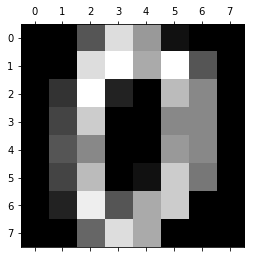

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

plt.gray() 
plt.matshow(digits.images[0])
plt.show()

#### (a)

Ako na ovom skupu želimo trenirati Bernoullijev naivni Bayesov klasifikator, značajke trebamo binarizirati. Proučite funkciju [`binarize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html) i binarizirajte skup podataka.

Na binariziranom skupu podataka možemo trenirati naš model. Naravno, da bismo mogli ispitati koliko dobro model radi, trebamo izdvojiti dio skupa za ispitivanje. Proučite funkciju [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) te načinite podjelu skupa na 70% primjera za učenje i 30% primjera za ispitivanje.

In [8]:
from sklearn.preprocessing import binarize
from sklearn import cross_validation

C:\Users\dreyus95\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Vaš kôd ovdje...

binarized = binarize(digits.data, threshold=9)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(binarized, digits.target, test_size=0.30)


#### (b)

Pročitajte opis modula [`naive_bayes`](http://scikit-learn.org/stable/modules/naive_bayes.html). Za klasifikaciju primjera s diskretnim značajkama treba nam tzv. *Bernoullijev naivni Bayes*, implementiran funkcijom [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB]). Proučite tu funkciju. Trenirajte model na skupu *digits* (na skupu za učenje). Izračunajte točnost modela na skupu za učenje i na skupu za ispitivanje koristeći funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [10]:
import sklearn.naive_bayes as nbay
from sklearn.metrics import accuracy_score

# Vaš kôd ovdje...
bnb = nbay.BernoulliNB()

bnb.fit(X_train, y_train)
out_train = bnb.predict(X_train)
out_test = bnb.predict(X_test)

print "Accuracy train: ", accuracy_score(y_train, out_train)
print "Accuracy test: ", accuracy_score(y_test, out_test)

Accuracy train:  0.894988066826
Accuracy test:  0.875925925926


**Q:** Je li odnos između tih dviju pogrešaka očekivan? Zašto?

#### (c)

Trenirajte model bez zaglađivanja (`alpha=0`) te izračunajte točnost takvog modela na oba skupa podataka.

In [11]:
# Vaš kôd ovdje...
bnb = nbay.BernoulliNB(alpha=0)

bnb.fit(X_train, y_train)
out_train = bnb.predict(X_train)
out_test = bnb.predict(X_test)

print "Accuracy train: ", accuracy_score(y_train, out_train)
print "Accuracy test: ", accuracy_score(y_test, out_test)

Accuracy train:  0.101034208433
Accuracy test:  0.0944444444444


C:\Users\dreyus95\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\dreyus95\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


**Q:** U čemu je problem? Opišite svojim riječima.

### 3. Bayesov klasifikator za kontinuirane značajke

#### (a)

Učitajte skup podataka *Iris* i podijelite ga skup za učenje i skup za provjeru u omjeru 70:30. Koristite funkciju [`datasets.load_iris`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

In [12]:
from sklearn.datasets import load_iris
from sklearn import cross_validation

# Vaš kôd ovdje...
iris = load_iris()
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.30)

#### (b)

Proučite razred [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) koji implementira naivan Bayesov klasifikator za kontinuirane značajke. Trenirajte model na skupu za učenje *Iris* i vrednujte njegovu točnost na skupu za ispitivanje.

In [13]:
# Vaš kôd ovdje...
gnb = nbay.GaussianNB()

gnb.fit(X_train, y_train)
out_test = gnb.predict(X_test)

print "Accuracy test: ", accuracy_score(y_test, out_test)

Accuracy test:  0.955555555556


#### (c)

Naivan Bayesov klasifikator u potpunosti zanemaruje korelacije između varijabli. Postavlja se pitanje bi li klasifikator na skupu *Iris* dosezao veću točnost kada bi modelirao (linearne) zavisnosti između varijabli.

Implementirajte Bayesov klasifikator s punom kovarijacijskom matricom za svaku klasu (dakle: nedijeljenom i nedijagonalnom kovarijacijskom matricom). Implementacija se sastoji od dvije funkcije: `train_GB` i `predict_GB`. Funkcija `train_GB(X,y)` neka trenira model Bayesovog klasifikatora sa Gaussovim gustoćama vjerojatnosti i vraća trenirani model. Za procjenu vektora srednjih vrijednosti $\mu_j$ i kovarijacijskih matrica $\Sigma_j$ možete koristiti [ove](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) funkcije. Funkcija `predict_GB(model,X)` neka daje predikcije modela na svim primjerima iz `X`. Alternativno, model možete implementirati kao klasu, a funkcije `train_GB` i `predict_GB` kao njezine metode.


In [14]:
# Vaš kôd ovdje...
from collections import Counter
import math

class Bayes:
    
    def __init__(self, data):
        self.numClasses =  len(Counter(data.target).keys()) # number of different classes in dataset
        self.covs = []  # covariance matrices for each class
        self.covs_det = [] # covariance matrices determinants 
        self.means = [] # mean for each class
        self.y_p = [] # probability of y=j, j=0...self.numClasses
    
    def fit(self, X, y):
        """
            Fits the model to the given data.
            Computes probalities of each class, and calculates required covariances and means per class.
        """
        for c in range(self.numClasses):
            datas = []
            targets = 0
            for data,target in zip(X,y):
                if target == c:
                    datas.append(data)
                    targets += 1
            self.y_p.append(1.0*targets / len(y))
            self.means.append(np.array(sp.mean(datas, axis=0)))
            self.covs.append(sp.absolute(sp.cov(datas, rowvar=0)))
            self.covs_det.append(sp.linalg.det(self.covs[c]))
                    
    
    def predict(self, X):
        """
            Predicts a class for each input x from dataset X.
        """
        predictions = []
        for x in X:
            h = []
            for i in range(self.numClasses):
                res = -0.5*np.log(self.covs_det[i])
                
                mid = np.subtract(x, self.means[i]).T.dot(sp.linalg.inv(self.covs[i]))
                mid = mid.dot(np.subtract(x, self.means[i]))
                
                res -= 0.5*mid
                res += np.log(self.y_p[i])
                h.append(res)
            predictions.append(np.argmax(h)) # append the class with the highest probability
        return predictions

#### (d)

Izračunajte točnost modela na ispitnome dijelu skupa *Iris* i usporedite je s točnošću naivnog Bayesovog klasifikatora iz podzadatka (b).

In [15]:
# Vaš kôd ovdje...
model = Bayes(iris)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print "Accuracy on test: ", "1.0, fully accurate!" if all(predictions == y_test) else accuracy_score(y_test, predictions)

Accuracy on test:  0.977777777778
